In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [69]:
data_orig = pd.read_csv('../csv (2010-21)/laliga_points_table_2020-21.csv')
played_matches=data_orig["played"][0]
print(played_matches)
print(data_orig)



38
    position             team  played  won  drawn  lost  goals_for  \
0          1  Atlético Madrid      38   26      8     4         67   
1          2      Real Madrid      38   25      9     4         67   
2          3        Barcelona      38   24      7     7         85   
3          4          Sevilla      38   24      5     9         53   
4          5    Real Sociedad      38   17     11    10         59   
5          6       Real Betis      38   17     10    11         50   
6          7       Villarreal      38   15     13    10         60   
7          8       Celta Vigo      38   14     11    13         55   
8          9          Granada      38   13      7    18         47   
9         10  Athletic Bilbao      38   11     13    14         46   
10        11          Osasuna      38   11     11    16         37   
11        12            Cádiz      38   11     11    16         36   
12        13         Valencia      38   10     13    15         50   
13        14     

In [70]:
data = pd.read_csv('../normalized_data/normalized.csv')

In [71]:
# Check for missing values and data types
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         1328 non-null   int64  
 1   team             1328 non-null   object 
 2   played           1328 non-null   int64  
 3   won              1328 non-null   float64
 4   drawn            1328 non-null   float64
 5   lost             1328 non-null   float64
 6   goals_for        1328 non-null   float64
 7   goals_against    1328 non-null   float64
 8   goal_difference  1328 non-null   float64
 9   points           1328 non-null   float64
 10  year             1328 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 114.2+ KB
None


In [72]:
data['Win Percentage'] = data['won'] / data['played']
data['Goals Per Game'] = data['goals_for'] / data['played']
data['Goals Against Per Game'] = data['goals_against'] / data['played']
data['Goal Difference Per Game'] = data['goal_difference'] / data['played']

In [73]:
print(data['year'])
    

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
1323    2021
1324    2021
1325    2021
1326    2021
1327    2021
Name: year, Length: 1328, dtype: int64


In [74]:
train_data = data[data['year'] < 2020]
test_data = data[data['year'] == 2020]

features = ['won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'Win Percentage', 'Goals Per Game', 'Goals Against Per Game', 'Goal Difference Per Game']
target = 'points'


rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(train_data[features], train_data[target])


RandomForestRegressor(max_depth=5, random_state=42)

In [75]:
y_pred = rf_model.predict(test_data[features])
mse = mean_squared_error(test_data[target], y_pred)
r2_error=r2_score(test_data[target],y_pred)
print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2_error)

Mean Squared Error:  59.74979508560316
R-squared Score:  0.7431735546242324


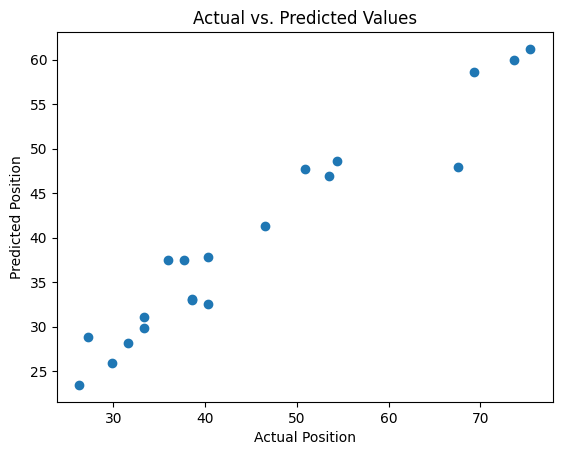

In [76]:
plt.scatter(test_data[target], y_pred)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs. Predicted Values")
plt.show()

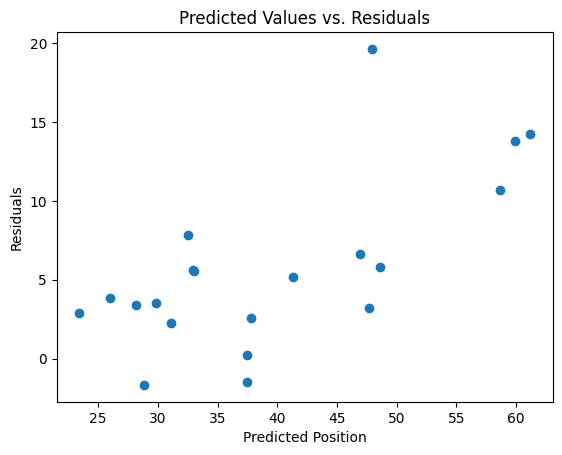

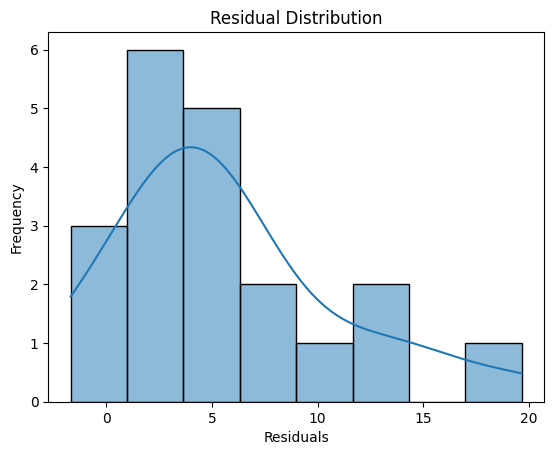

In [77]:
# Create a scatter plot of predicted values vs. residuals
plt.scatter(y_pred, test_data[target] - y_pred)
plt.xlabel("Predicted Position")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.show()

# Create a histogram of residuals
sns.histplot(test_data[target] - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

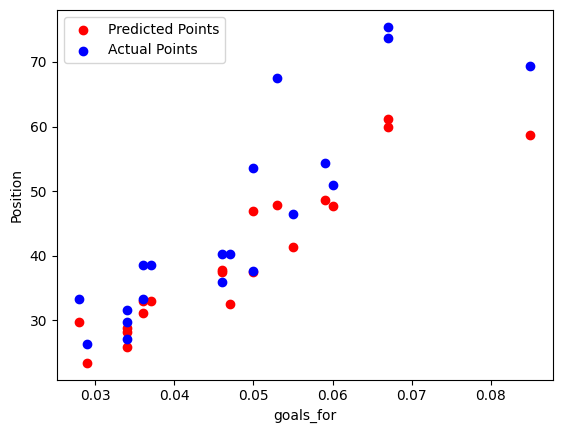

In [78]:
import matplotlib.pyplot as plt
plt.scatter(test_data["goals_for"], y_pred, color='red', label='Predicted Points')

plt.scatter(test_data["goals_for"], test_data[target], color='blue', label='Actual Points')

plt.xlabel("goals_for")
plt.ylabel("Position")
plt.legend()

plt.show()


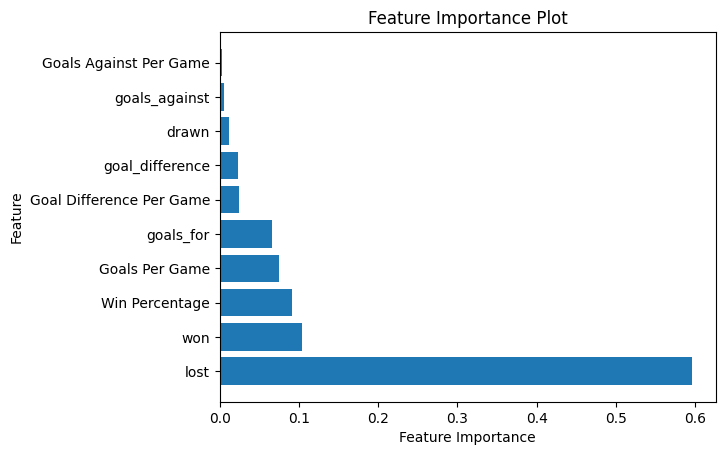

In [79]:

coef_df = pd.DataFrame({'feature': test_data[features].columns, 'importance': rf_model.feature_importances_})
coef_df = coef_df.sort_values(by='importance', ascending=False)

plt.barh(coef_df['feature'], coef_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error

mae = mean_absolute_error(test_data[target], y_pred)


accuracy = (1 - (mae / test_data[target].mean())) * 100


print("Percentage Accuracy:", accuracy)


Percentage Accuracy: 86.73062670954302


In [81]:
#print(y_pred)
print(len(y_pred))
y_pred.sort()
y_pred=np.flip(y_pred)
print(y_pred)
print(len(y_pred))

20
[61.19346444 59.90130998 58.61327812 48.5998936  47.90158496 47.66236615
 46.89946529 41.33137205 37.79186498 37.47661173 37.43047901 33.06257231
 32.95364559 32.48992436 31.08982192 29.80650352 28.86766481 28.19319056
 25.95663662 23.4384634 ]
20


In [82]:
print("rank","team","predicted_2020","original_2020")
for i in range (0,len(y_pred)):
    points=(y_pred[i]*played_matches*3)/100
    print(i+1,test_data.iloc[i]['team'],round(points),data_orig["points"][i])


rank team predicted_2021 original_2021
1 Atlético Madrid 70 86
2 Real Madrid 68 84
3 Barcelona 67 79
4 Sevilla 55 77
5 Real Sociedad 55 62
6 Real Betis 54 61
7 Villarreal 53 58
8 Celta Vigo 47 53
9 Granada 43 46
10 Athletic Bilbao 43 46
11 Osasuna 43 44
12 Cádiz 38 44
13 Valencia 38 43
14 Levante 37 41
15 Getafe 35 38
16 Alavés 34 38
17 Elche 33 36
18 Huesca 32 34
19 Valladolid 30 31
20 Eibar 27 30
